In [ ]:
#@markdown # Get the code repository and models

HOME = '/content'
%cd $HOME

# Install conda
!pip install -q condacolab
import condacolab
condacolab.install()

# Get the requirements list
!wget https://q4j3.c11.e2-5.dev/downloads/handrefiner%2Freqpip2.txt -O reqpip.txt

# Install the conda environment
!conda create --name myenv python=3.10

python = "/usr/local/envs/myenv/bin/python3.10"
pip = "/usr/local/envs/myenv/bin/pip"

# Get the repo
!git clone https://github.com/wenquanlu/HandRefiner/
%cd HandRefiner
!git clone --recursive https://github.com/microsoft/MeshGraphormer.git
%cd MeshGraphormer
!mkdir -p models
!cp ../scripts/download_models.sh scripts/download_models.sh
!cp ../scripts/_gcnn.py src/modeling/_gcnn.py
!cp ../scripts/_mano.py src/modeling/_mano.py
!cp ../scripts/config.py src/modeling/data/config.py
!bash scripts/download_models.sh

import fileinput
import os
from os import path

%cd $HOME/HandRefiner/MeshGraphormer/src/modeling/data
if not path.exists(f'{HOME}/HandRefiner/MeshGraphormer/src/modeling/data/MANO_RIGHT.pkl'):
    get_ipython().system('wget -O MANO_RIGHT.pkl https://github.com/huchenlei/HandRefinerPortable/raw/master/mesh_graphormer/modeling/data/MANO_RIGHT.pkl')
if not path.exists(f'{HOME}/HandRefiner/MeshGraphormer/src/modeling/data/MANO_LEFT.pkl'):
    get_ipython().system('wget -O MANO_LEFT.pkl https://github.com/huchenlei/HandRefinerPortable/raw/master/mesh_graphormer/modeling/data/MANO_LEFT.pkl')
%cd $HOME/HandRefiner
%cd preprocessor
if not path.exists(f'{HOME}/HandRefiner/preprocessor/hand_landmarker.task'):
    get_ipython().system('wget https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task')

# Download models
!rm -f /content/HandRefiner/MeshGraphormer/models/hrnet/*.*
%cd /content/HandRefiner/MeshGraphormer/models/hrnet
!wget https://huggingface.co/hr16/ControlNet-HandRefiner-pruned/resolve/main/hrnetv2_w64_imagenet_pretrained.pth
!wget https://huggingface.co/camenduru/HandRefiner/raw/main/hrnet/cls_hrnet_w64_sgd_lr5e-2_wd1e-4_bs32_x100.yaml

!rm -f /content/HandRefiner/MeshGraphormer/models/graphormer_release/*.*
%cd /content/HandRefiner/MeshGraphormer/models/graphormer_release
!wget https://huggingface.co/hr16/ControlNet-HandRefiner-pruned/resolve/main/graphormer_hand_state_dict.bin


def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

config_file = find('config.py', f'{HOME}/HandRefiner')
print('modifying file ' + str(config_file))
for line in fileinput.input(config_file, inplace=True):
    if ('handrefiner_root=""' in line):
        line = line.replace('handrefiner_root=""', f'handrefiner_root="{HOME}/HandRefiner"')
    print(line, end='')

!mkdir $HOME/HandRefiner/models

%cd $HOME/HandRefiner/MeshGraphormer/src/modeling/bert
!cp ../../../transformers/pytorch_transformers/file_utils.py .
!cp ../../../transformers/pytorch_transformers/modeling_bert.py .
!cp ../../../transformers/pytorch_transformers/modeling_utils.py .

!mkdir $HOME/HandRefiner/input
!mkdir $HOME/HandRefiner/output



In [ ]:
#@markdown # Install requirements

%%shell
eval "$(conda shell.bash hook)"
conda activate myenv
python --version
pip install pip==24.0
pip install -r /content/reqpip.txt

cd /content/HandRefiner/MeshGraphormer
pip install ./manopth/.

In [ ]:
#@markdown # Optional: Connect Google Drive
import os
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#@markdown # Download the Inpaint Model

#@markdown Run this step to download the inpaint model to the /content/HandRefiner/models folder.

#@markdown You can skip this step if you have the model on Google Drive.

#@markdown In case the models folder is empty after this step, please manually upload the model using the Files manager on the left hand side.
#@markdown The model can be fou1nd here: https://drive.google.com/file/d/1eD2Lnfk0KZols68mVahcVfNx3GnYdHxo/view?usp=sharing

from os import path
HOME = '/content'
python = "/usr/local/envs/myenv/bin/python3.10"
pip = "/usr/local/envs/myenv/bin/pip"

%cd $HOME/HandRefiner/models
!pip install gdown
if not path.exists(f'{HOME}/HandRefiner/models/inpaint_depth_control.ckpt'):
    get_ipython().system('gdown "https://drive.google.com/u/1/uc?id=1eD2Lnfk0KZols68mVahcVfNx3GnYdHxo&confirm=t"')
if not path.exists(f'{HOME}/HandRefiner/models/inpaint_depth_control.ckpt'):
    get_ipython().system('wget "https://j2q5.c17.e2-1.dev/download/pogscafe/inpaint_depth_control.ckpt"')

In [ ]:
#@markdown # Optional: Download Sample Images
#@markdown Run this step to download sample images to the Input folder, and you can run the next step with its default values.

%cd $HOME/HandRefiner/input
!wget -O waving.jpg https://github.com/wandaweb/HandRefinerColab/raw/main/sample/input/waving.jpg
!wget -O blackboard.jpg https://github.com/wandaweb/HandRefinerColab/raw/main/sample/input/blackboard.jpg

In [5]:
#@markdown # Create the image scaling function
import datetime, random, os
from IPython.display import display, Image as DisplayImage
from PIL import Image
from os import path

def scale_image(input_path):
    # Open the image
    original_image = Image.open(input_path)

    # Check if the image size is already 512x512
    if original_image.size == (512, 512):
        print("Image is already 512x512 pixels. No scaling needed.")
        return input_path

    # Resize the image to 512x512
    scaled_image = original_image.resize((512, 512))

    # Create the output path for the scaled image
    output_path = os.path.join(os.path.dirname(input_path), f"s_{os.path.basename(input_path)}")

    # Save the scaled image
    scaled_image.save(output_path)

    print(f"Image scaled to 512x512 and saved to: {output_path}")
    return output_path

/content/HandRefiner
Image scaled to 512x512 and saved to: /content/HandRefiner/input/s_blackboard.jpg
Image scaled to 512x512 and saved to: /content/HandRefiner/input/s_waving.jpg
/usr/local/envs/myenv/bin/python3.10 handrefiner.py    --prompt_file prompts.json    --input_dir "/"    --seed 1467002593    --out_dir /content/HandRefiner/output/out_20250407-003316    --strength 0.6    --weights /content/HandRefiner/models/inpaint_depth_control.ckpt    
inpaint_depth_control.ckpt
Python 3.10.16
inpaint_depth_control.ckpt
/usr/local/envs/myenv/bin/python3.10 handrefiner.py --prompt_file prompts.json --input_dir "/" --seed 1467002593 --out_dir /content/HandRefiner/output/out_20250407-003316 --strength 0.6 --weights /content/HandRefiner/models/inpaint_depth_control.ckpt
No module 'xformers'. Proceeding without it.
/usr/local/envs/myenv/lib/python3.10/site-packages/pytorch_lightning/utilities/distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_on

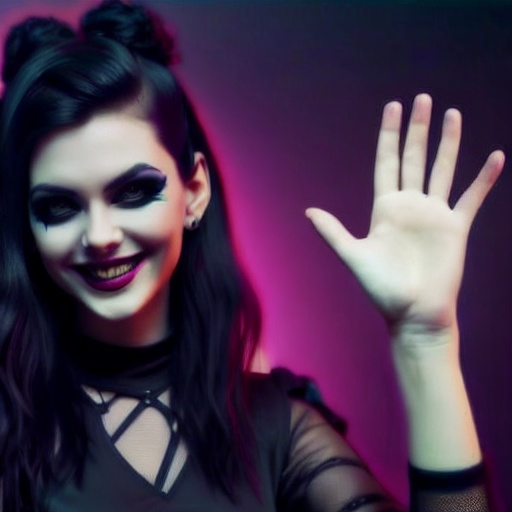

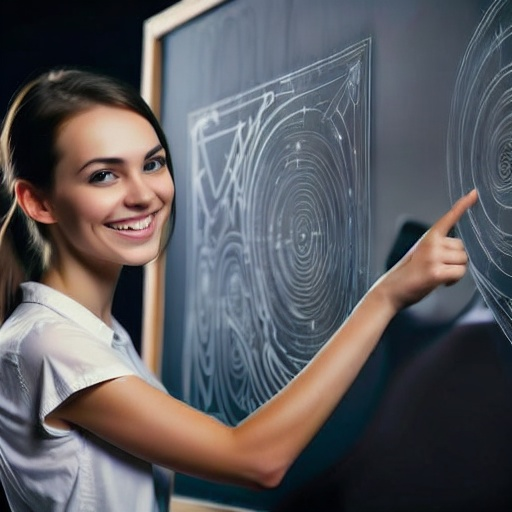

In [6]:
#@title Parameters for Multiple Images

#@markdown # Fix Hands in Images
#@markdown Please enter tha path and prompt for at least one image. The paths must not contain spaces.
input_image_1 = "/content/HandRefiner/input/blackboard.jpg" #@param {type:"string"}
prompt_1 = "woman pointing with her index finger"#@param {type:"string"}
#@markdown
input_image_2 = "/content/HandRefiner/input/waving.jpg" #@param {type:"string"}
prompt_2 = "woman waving, left hand waving" #@param {type:"string"}
#@markdown
input_image_3 = "" #@param {type:"string"}
prompt_3 = "" #@param {type:"string"}
#@markdown
input_image_4 = "" #@param {type:"string"}
prompt_4 = "" #@param {type:"string"}
#@markdown
input_image_5 = "" #@param {type:"string"}
prompt_5 = "" #@param {type:"string"}
#@markdown

strength = 0.6 #@param {type:"number"}
#@markdown If the seed is a negative number, it will be randomly generated.
seed = -1 #@param {type:"integer"}

#@markdown If output_folder is empty, the base output folder will be set to /content/HandRefiner/output and the subfolder name will be randomly generated.
output_folder = "" #@param {type:"string"}

#@markdown Change the model_path value if you downloaded the model to a different location
model_path = "/content/HandRefiner/models/inpaint_depth_control.ckpt" #@param {type:"string"}


if seed < 0:
  seed = random.randint(0, 4294967295)

%cd $HOME/HandRefiner

# Create the json file with input images and prompts
with open('prompts.json', 'w') as file:
    lines = []
    if not input_image_1 == "":
        input_image_1 = scale_image(input_image_1)
        lines.append(f'{{"img": "{input_image_1}", "txt": "{prompt_1}"}}\n')
    if not input_image_2 == "":
        input_image_2 = scale_image(input_image_2)
        lines.append(f'{{"img": "{input_image_2}", "txt": "{prompt_2}"}}\n')
    if not input_image_3 == "":
        input_image_3 = scale_image(input_image_3)
        lines.append(f'{{"img": "{input_image_3}", "txt": "{prompt_3}"}}\n')
    if not input_image_4 == "":
        input_image_4 = scale_image(input_image_4)
        lines.append(f'{{"img": "{input_image_4}", "txt": "{prompt_4}"}}\n')
    if not input_image_5 == "":
        input_image_5 = scale_image(input_image_5)
        lines.append(f'{{"img": "{input_image_5}", "txt": "{prompt_5}"}}\n')
    file.writelines(lines)

# Create the output folder
if output_folder == '':
    output_folder = f'out_{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}'
    output_path = f'{HOME}/HandRefiner/output/{output_folder}'
else:
    output_path = output_folder
!mkdir $output_path

# Generate the handrefiner command
cmd = f'''{python} handrefiner.py \
   --prompt_file prompts.json \
   --input_dir "/" \
   --seed {seed} \
   --out_dir {output_path} \
   --strength {strength} \
   --weights {model_path} \
   '''
print(cmd)
os.environ["CMD"] = cmd

!ls /content/HandRefiner/models

# Execute the command
get_ipython().run_cell_magic('shell', '', 'eval "$(conda shell.bash hook)"\nconda activate myenv\npython --version\nls /content/HandRefiner/models/\necho $CMD\n$CMD\n\n')

# Show all images in the output folder
%cd $output_path
for i in os.listdir(output_path):
    if (i.endswith(".jpg")):
        display(DisplayImage(filename=i, retina=True))



In [8]:
#@title Generate a single image with varying seed values

%%shell
eval "$(conda shell.bash hook)"
conda activate myenv
cd /content/HandRefiner
python handrefiner.py --prompt "woman waving, left hand waving" --input_img /content/HandRefiner/input/s_waving.jpg \
  --seed -1 \
  --out_dir /content/HandRefiner/output \
  --strength 0.6 \
  --weights models/inpaint_depth_control.ckpt \
  --n_iter 5


No module 'xformers'. Proceeding without it.
/usr/local/envs/myenv/lib/python3.10/site-packages/pytorch_lightning/utilities/distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v1.10.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(
ControlLDM: Running in eps-prediction mode
DiffusionWrapper has 859.54 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
/usr/local/envs/myenv/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were n